# Step 4: Advanced Analytics
# In this notebook, we try more advanced techniques:
# - Trend analysis
# - Predictive modeling (logistic regression)
# - Clustering (KMeans) to find patterns among violations

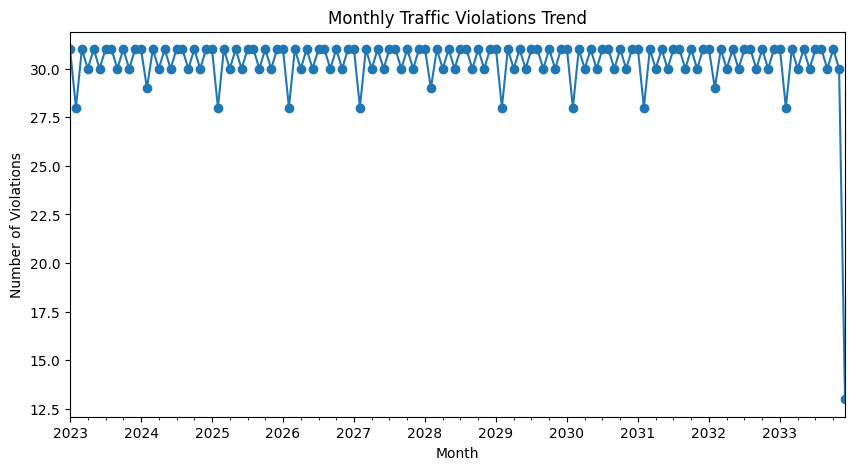


=== Logistic Regression: Predict Fine Payment ===

              precision    recall  f1-score   support

           0       0.49      0.79      0.60       392
           1       0.50      0.20      0.28       408

    accuracy                           0.49       800
   macro avg       0.49      0.49      0.44       800
weighted avg       0.49      0.49      0.44       800



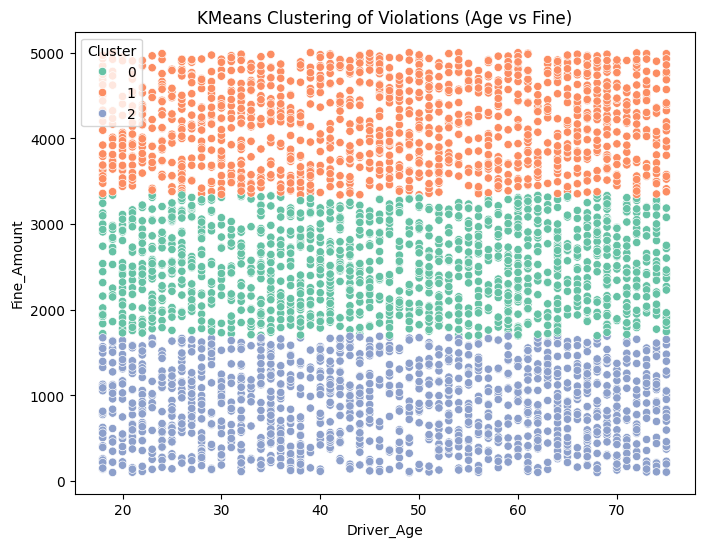

In [1]:


import sys
sys.path.append("../src")

from utils import load_data, clean_data
from analysis_utils import predict_fine_payment

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load + clean dataset
df = clean_data(load_data())

# -------------------------
# 1. Trend analysis over time
# -------------------------
df['Month'] = df['Date'].dt.to_period('M')
monthly = df.groupby('Month').size()

monthly.plot(kind="line", figsize=(10,5), marker='o')
plt.title("Monthly Traffic Violations Trend")
plt.xlabel("Month")
plt.ylabel("Number of Violations")
plt.show()

# -------------------------
# 2. Predictive modeling
# -------------------------
print("\n=== Logistic Regression: Predict Fine Payment ===\n")
report = predict_fine_payment(df)
print(report)

# -------------------------
# 3. Clustering
# -------------------------
features = df[['Driver_Age', 'Fine_Amount']].dropna()

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Driver_Age", y="Fine_Amount", hue="Cluster", palette="Set2")
plt.title("KMeans Clustering of Violations (Age vs Fine)")
plt.show()
